In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [3]:
def softmax(x):
    e_x = np.exp(x)
    return e_x / np.sum(e_x)

In [4]:
class ShallowNN:
    def __init__(self, num_input, num_hidden, num_output):
        self.W_h = np.zeros((num_hidden, num_input), dtype=np.float32)
        self.b_h = np.zeros((num_hidden,), dtype=np.float32)
        self.W_o = np.zeros((num_output, num_hidden), dtype=np.float32)
        self.b_o = np.zeros((num_output,), dtype=np.float32)
        
    def __call__(self, x):
        h = sigmoid(np.matmul(self.W_h, x) + self.b_h)
        return softmax(np.matmul(self.W_o, h) + self.b_o)

In [5]:
dataset = np.load('ch2_dataset.npz')
inputs = dataset['inputs']
labels = dataset['labels']

In [6]:
model = ShallowNN(2, 128, 10)

In [7]:
weights = np.load('ch2_parameters.npz')
model.W_h = weights['W_h']
model.b_h = weights['b_h']
model.W_o = weights['W_o']
model.b_o = weights['b_o']

In [8]:
outputs = list()
for pt, label in zip(inputs, labels):
    output = model(pt)
    outputs.append(np.argmax(output))
outputs = np.stack(outputs, axis=0)

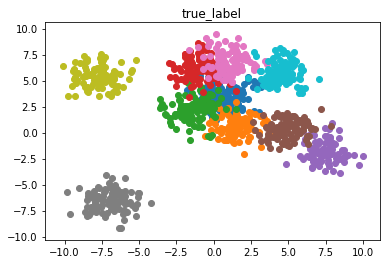

In [9]:
plt.figure()
for idx in range(10):
    mask = labels == idx
    plt.scatter(inputs[mask, 0], inputs[mask, 1])
plt.title('true_label')
plt.show()

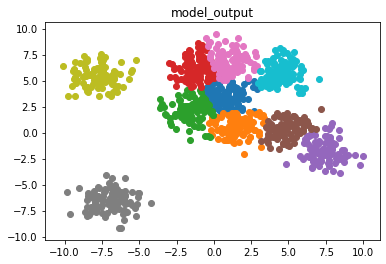

In [10]:
plt.figure()
for idx in range(10):
    mask = outputs == idx
    plt.scatter(inputs[mask, 0], inputs[mask, 1])
plt.title('model_output')
plt.show()